Jeyner Arango 201106

Oscar Méndez 20402

# Lista 02

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lu_factor, lu_solve, qr

## Ejercicio 1

## Ejercicio 2

## Ejercicio 3

### Inciso a)

In [ ]:
results_2a = {}
for n in [2, 3, 5, 10, 15, 20, 25]:
    H = np.array([[1/(i+j -1) for j in range(1, n+1)] for i in range(1, n+1)])
    results_2a[n] = np.linalg.norm(H) * np.linalg.norm(np.linalg.inv(H))
plt.plot(results_2a.keys(), results_2a.values())
plt.show()
results_2a

### Inciso b)

In [45]:
f = lambda x: np.sum([np.sin((k+1)*np.pi*x) for k in range(17)], axis=0)

def compare_aprroximation(f, f_approx, num_vals=1000):
    x_vals = np.linspace(0, 1, 1000)
    approximation = f_approx(x_vals)
    f_vals = f(x_vals)

    rmse = np.sqrt(((f_vals - approximation) ** 2).mean())
    mae = np.abs(f_vals - approximation).mean()

    plt.figure(figsize=(9, 5))
    plt.plot(x_vals, f(x_vals), label='f(x)')
    plt.plot(x_vals, approximation, label='Approximacion')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title('Aproximación de f(x)')
    plt.show()

    return rmse, mae

In [1]:
def approximate_function_lu(f, n):
    A = np.array([[1/(i+j -1) for j in range(1, n+1)] for i in range(1, n+1)])
    b = np.zeros(n)

    for i in range(n):
        b[i] = np.trapz(f(np.linspace(0, 1, 1000)) * np.linspace(0, 1, 1000)**i, dx=1/1000)

    # Realizar descomposición LU
    lu, piv = lu_factor(A)

    # Resolver el sistema de ecuaciones utilizando la descomposición LU
    c = lu_solve((lu, piv), b)
    
    def f_approx(x):
        return sum([c[i] * (x**i) for i in range(n)])
    
    return f_approx

f_approx = approximate_function_lu(f, 20)
rmse, mae = compare_aprroximation(f, f_approx)

print("RMSE:", rmse)
print("MAE:", mae)

NameError: name 'f' is not defined

### Inciso c)

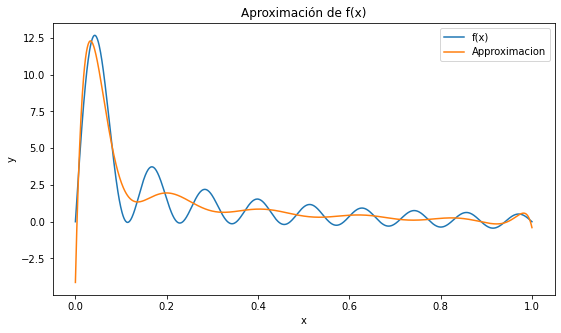

RMSE: 0.8338560996617813
MAE: 0.6295924863908618


In [46]:
def approximate_function_qr(f, n):
    A = np.array([[1/(i+j -1) for j in range(1, n+1)] for i in range(1, n+1)])
    b = np.zeros(n)

    for i in range(n):
        b[i] = np.trapz(f(np.linspace(0, 1, 1000)) * np.linspace(0, 1, 1000)**i, dx=1/1000)

    Q, R = qr(A)

    c = np.linalg.solve(R, np.dot(Q.T, b))
    
    def f_approx(x):
        return sum([c[i] * (x**i) for i in range(n)])
    
    return f_approx

f_approx = approximate_function_qr(f, 20)
rmse, mae = compare_aprroximation(f, f_approx)

print("RMSE:", rmse)
print("MAE:", mae)

Para este caso con n=20, es mejor la apoximacion con QR.